In [1]:
import cv2

# Load the provided video file
video_path = "C:/Users/yogi2/Downloads/IVA - 4/MANN.mp4"
out_put = 
cap = cv2.VideoCapture(video_path)

# Check if video loaded successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")


Video loaded successfully.


In [2]:
# Create a list to store frames
frames = []
frame_count = 0

# Loop through video and extract frames
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
    frame_count += 1

cap.release()  # Release video capture after extraction
print(f"Total frames extracted: {frame_count}")


Total frames extracted: 280


In [3]:
import numpy as np

segmented_frames = []

for frame in frames:
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply color thresholding for segmentation
    _, segmented_frame = cv2.threshold(gray_frame, 120, 255, cv2.THRESH_BINARY)
    segmented_frames.append(segmented_frame)

print("Spatio-temporal segmentation completed.")


Spatio-temporal segmentation completed.


In [4]:
# Calculate frame difference to detect consistent regions over time
foreground_background = []

for i in range(1, len(segmented_frames)):
    # Compute the absolute difference between consecutive frames
    frame_diff = cv2.absdiff(segmented_frames[i], segmented_frames[i-1])
    
    # Threshold the difference to highlight areas of change
    _, motion_mask = cv2.threshold(frame_diff, 25, 255, cv2.THRESH_BINARY)
    
    # Save motion mask showing areas of significant change
    foreground_background.append(motion_mask)

print("Object tracking through spatio-temporal segmentation completed.")


Object tracking through spatio-temporal segmentation completed.


In [5]:
scene_cuts = []

for i in range(1, len(frames)):
    # Compute histogram difference between consecutive frames
    hist_prev = cv2.calcHist([cv2.cvtColor(frames[i-1], cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
    hist_curr = cv2.calcHist([cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
    
    # Calculate correlation between histograms (a low correlation may indicate a scene cut)
    correlation = cv2.compareHist(hist_prev, hist_curr, cv2.HISTCMP_CORREL)
    
    # Check for hard cuts (abrupt changes)
    if correlation < 0.5:  # Threshold for hard cut detection
        scene_cuts.append(i)

print(f"Scene cuts detected at frames: {scene_cuts}")


Scene cuts detected at frames: []


In [6]:
# Highlight and save frames where scene cuts are detected
highlighted_frames = []

for cut in scene_cuts:
    frame_copy = frames[cut].copy()
    cv2.putText(frame_copy, "Scene Cut Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    highlighted_frames.append(frame_copy)

print("Scene cuts marked on frames.")


Scene cuts marked on frames.


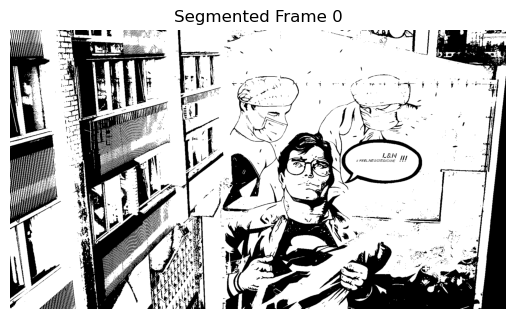

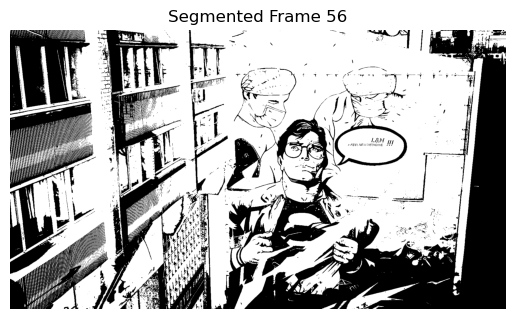

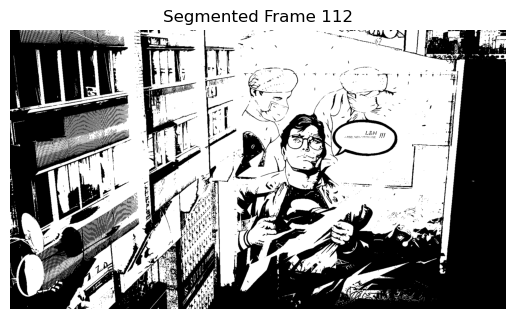

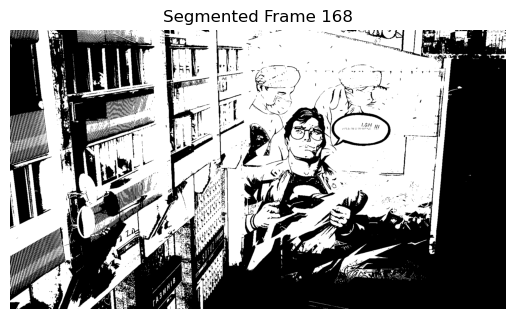

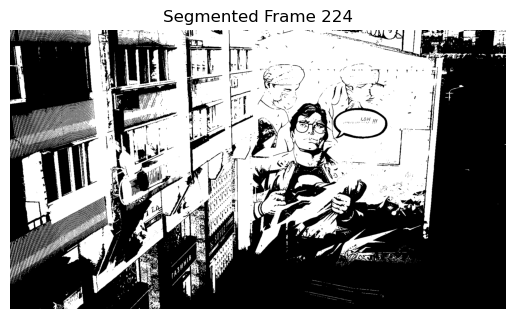

In [7]:
import matplotlib.pyplot as plt

# Display frames with scene cuts
for idx, frame in enumerate(highlighted_frames[:5]):  # Display first 5 for example
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Scene Cut at Frame {scene_cuts[idx]}")
    plt.axis('off')
    plt.show()

# Display segmentation results for a few frames
for i in range(0, len(segmented_frames), int(len(segmented_frames)/5)):  # Display 5 frames evenly spaced
    plt.imshow(segmented_frames[i], cmap='gray')
    plt.title(f"Segmented Frame {i}")
    plt.axis('off')
    plt.show()
